In [203]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
#         out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
#         out = F.max_pool2d(out, 2)
#         out = out.view(out.size(0), -1)
#         out = F.relu(self.fc1(out))
#         out = F.relu(self.fc2(out))
#         out = self.fc3(out)
        return out

from torchvision import datasets, transforms
model = LeNet()
dataset = datasets.MNIST('../data', train=True, download=True,
               transform=transforms.Compose([
                   transforms.ToTensor(),
                   transforms.Normalize((0.1307,), (0.3081,))
               ])),

In [230]:
import torch

def affinity(x1, x2):
    N, C, T, H, W  = x1.shape

    # assert x1.shape == x2.shape

    # assuming xs: N, C, 1, H, W
    x1 = x1.transpose(3, 4).contiguous() # for the inlier counter
    x1_flat = x1.view(x1.size(0), x1.size(1), -1)
    x1_flat = x1_flat.transpose(1, 2)
    x2_flat = x2.transpose(3, 4).contiguous().view(x2.size(0), x2.size(1), -1)

    # import pdb; pdb.set_trace()

    A = torch.matmul(x1_flat, x2_flat)
    A = torch.div(A, C**0.5)
    return A

def get_flow(corr):
    # assume corr is shape N x H * W x W x H

#     corr = torch.randn((2, 10 * 10, 10, 10))
    nnv, nnf = corr.max(dim=1)
    
    corr = 
#     print(nnf)
    nnf = nnf.transpose(-1, -2)

    u = nnf % nnf.shape[-1]
    v = nnf / nnf.shape[-2] # nnf is an IntTensor so rounds automatically

    rr = torch.arange(u.shape[-1])[None].long()
    
    print('********* NEARESTS')
    print(u, v)
    print('********* NEARESTS')
    for i in range(u.shape[-1]):
        u[:, i] -= rr

    for i in range(v.shape[-1]):
        v[:, :, i] -= rr

    return u, v
        
import cv2
import numpy as np

def draw_hsv(flow):
    h, w = flow.shape[:2]
    fx, fy = flow[:,:,0], flow[:,:,1]
    ang = np.arctan2(fy, fx) + np.pi
    v = np.sqrt(fx*fx+fy*fy)
    hsv = np.zeros((h, w, 3), np.uint8)
    hsv[...,0] = ang*(180/np.pi/2)
    hsv[...,1] = 255
    hsv[...,2] = np.minimum(v*4, 255)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)#[:, :, ::-1]
    return bgr

# flows = vis_flow(u, v)

# return flows, u, v

torch.Size([3, 28, 28])


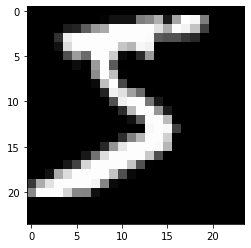

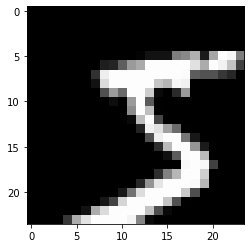

torch.Size([1, 16, 16, 16]) f1 shape
unsqueezed torch.Size([1, 3, 1, 24, 24])
torch.Size([1, 576, 24, 24])
********* NEARESTS
tensor([[[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
          23, 23, 23, 23, 23, 23, 23],
         [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
          23, 23, 23, 23, 23, 23, 23],
         [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
          23, 23, 23, 23, 23, 23, 23],
         [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
          23, 23, 23, 23, 23, 23, 23],
         [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
          23, 23, 23, 23, 23, 23, 23],
         [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,  1,
           1,  1, 23,  1,  1,  1,  1],
         [23, 23, 23, 23, 23, 23, 23, 23, 23,  1,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  1,  1,  1],
         [23, 23, 23, 23, 23, 23, 23,  1,  1,  1,  1,  

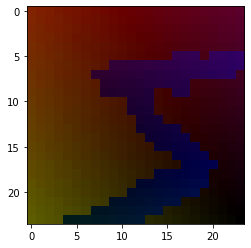

In [232]:
import matplotlib.pyplot as plt
%matplotlib inline

x = torch.stack([dataset[0][0][0][0] for _ in range(3)])

# x = torch.randn(3, 28, 28)
print(x.shape)
x1 = x[:,     4:, 4:]
x2 = x[:, :-4, :  -4]

def show(xx):
#     xx = torch.stack([xx[0] for _ in range(3)])

    xx = (xx - xx.min()) / (xx - xx.min()).max()
    plt.imshow(xx.numpy().transpose(1,2,0))
    plt.show()

show(x1)
show(x2)
import torch.nn.functional as F
f1 = model(x1[None])
f2 = model(x2[None])


print(f1.shape, 'f1 shape')
f1 = x1[None].contiguous()
f2 = x2[None].contiguous()
# f1 = F.normalize(f1, dim=1)
# f2 = F.normalize(f2, dim=1)

print('unsqueezed', f1.unsqueeze(2).shape)
A = affinity(f1.unsqueeze(2), f2.unsqueeze(2))

# print(A.shape)
A = A.view(*A.shape[:-1], f1.shape[-1], -1)
print(A.shape)

u, v = get_flow(A)
print(u[0][0])
flow = torch.stack([u, v], dim=-1)[0]
print(flow.shape)

flows = draw_hsv(flow)
print(flows.shape)
plt.imshow(flows)
plt.show()


In [223]:
import spatial_correlation_sampler as corr

ModuleNotFoundError: No module named 'spatial_correlation_sampler'

In [111]:
x1, x2 = x1[None], x2[None]


In [30]:
affilter = corr.SpatialCorrelationSampler(
    kernel_size=1,
    patch_size=24,
    stride=1,
    padding=0,
    dilation=1,
    dilation_patch=1
)
n, c, h, w = x1.shape

xx1 = x1.contiguous().view(n, c, h*w).contiguous().transpose(1, 2)
xx2 = x2.contiguous().view(n, c, h*w)

a1 = torch.matmul(xx1, xx2).view(n, h, w, h, w)
a2 = affilter(x1, x2).transpose(2,3)
print(a2.shape)
(a1 - a2).sum()

torch.Size([1, 24, 24, 24, 24])


tensor(2823.5474)